In [1]:
from models import BiLSTM, BiRNN
import modal
import torch 
import lab
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

In [76]:
X, y, ws, __ = modal.generate_data(num_data=32*10, num_w_points=200, neg_an=True, max_modes=5)  # sigma_max = 0.15, max_modes = 7 (defaults)
valX, valy, _, __ = modal.generate_data(num_data=32*1, num_w_points=200, neg_an=True)

In [362]:
def plot_tf(tf, y, todb=True, ws = None, figsize=(8,6), start_idx=0):
    """Plot transfer function and show training labels and mode frequencies."""
    fig, ax = plt.subplots(figsize=figsize)
    tf = tf[start_idx:]
    y = y[start_idx:]
    w = np.linspace(0, 1, len(y))
    if todb:
        ax.scatter(w[y == 1], modal.to_db(tf)[y == 1], c='red', marker='o', label=r'Training Labels $(y_m = 1)$')
        # ax.scatter(w[y == 1], modal.to_db(tf)[y == 1], c='red', marker='o', label=r'Model Predictions')
        ax.plot(w, modal.to_db(tf), label = 'Transfer Function', c='blue', alpha=0.7)
        # ax.scatter(w[y == 1], modal.to_db(tf)[y == 1], c='red', marker='o', label=r'Training Labels $(y_m = 1)$')
    else:
        # Plot maginitude of transfer function
        tf_vals = np.linalg.norm(tf, axis=-1)
        # tf_vals = normalise(tf)
        ax.plot(w, tf_vals, label = 'Transfer Function', c='blue')
        ax.scatter(w[y == 1], tf_vals[y == 1], c='red', marker='o')
        ax.scatter(w[y == 2], tf_vals[y == 2], c='orange', marker='o')

    if ws is not None:
        count = 0
        for w_n in ws:
            count += 1
            if count == 1:
                ax.axvline(w_n, c='black', linestyle='--', label='Mode Frequency', alpha=0.5)
            else:
                ax.axvline(w_n, c='black', linestyle='--', alpha=0.5)
    
    ax.set_xlabel('Normalised Frequency')
    if todb:
        ax.set_ylabel('Magnitude (dB)')
    else:
        ax.set_ylabel('Magnitude')
    ax.legend()
    # ax.set_ylim(-15,35)
    # ax.set_xlim(0,1)
    plt.show()
    return fig, ax

In [253]:
idx = np.random.randint(0, X.shape[0])

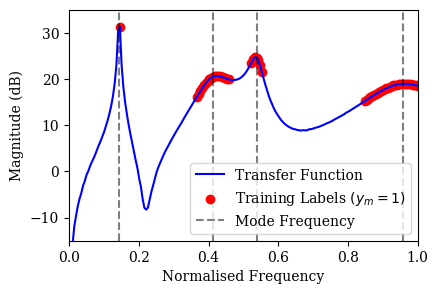

(<Figure size 450x300 with 1 Axes>,
 <Axes: xlabel='Normalised Frequency', ylabel='Magnitude (dB)'>)

In [265]:
plot_tf(X[idx], y[idx], ws=ws[idx], todb=True, figsize=(4.5, 3), start_idx=0)

In [269]:
X, y, ws, __ = modal.generate_data(num_data=32*450, num_w_points=200, neg_an=True)  # sigma_max = 0.15, max_modes = 7 (defaults)
valX, valy, _, __ = modal.generate_data(num_data=32*50, num_w_points=200, neg_an=True)

In [331]:
RNN_model = BiRNN(input_size=2, hidden_size=100, num_layers=3, num_classes=1)
rnn_results = modal.train_model_binary(RNN_model, X, y, valX, valy, name='rnn(17.01)', num_epochs=50)

  2%|▏         | 1/50 [00:42<35:04, 42.94s/it]

Epoch [1/50], Loss: 0.8334847847620647, Precision: 0.6800252140706691, Recall: 0.5666633960777402
Validation Precision: 0.808923455171036, Validation Recall: 0.7816379959455003


  4%|▍         | 2/50 [01:25<34:00, 42.51s/it]

Epoch [2/50], Loss: 0.7677097823884752, Precision: 0.730615123658423, Recall: 0.5924643486644421
Validation Precision: 0.7888936149434153, Validation Recall: 0.818870949953433


  6%|▌         | 3/50 [02:07<33:08, 42.31s/it]

Epoch [3/50], Loss: 0.7405390147368113, Precision: 0.7520472288093399, Recall: 0.5988814699254583
Validation Precision: 0.7681223314677976, Validation Recall: 0.8303517060789524


  8%|▊         | 4/50 [02:49<32:22, 42.24s/it]

Epoch [4/50], Loss: 0.7468366334173414, Precision: 0.7474016522726322, Recall: 0.5960647917026132
Validation Precision: 0.8098350359548018, Validation Recall: 0.8183052396677766


 10%|█         | 5/50 [03:31<31:43, 42.29s/it]

Epoch [5/50], Loss: 0.7408259579870435, Precision: 0.7499138959617435, Recall: 0.5996115307873235
Validation Precision: 0.7674558698618575, Validation Recall: 0.8398807613061925


 12%|█▏        | 6/50 [04:14<31:04, 42.38s/it]

Epoch [6/50], Loss: 0.760751783185535, Precision: 0.7383223012300104, Recall: 0.5928989754459295
Validation Precision: 0.7815857111125988, Validation Recall: 0.8188744667056205


 14%|█▍        | 7/50 [04:57<30:40, 42.81s/it]

Epoch [7/50], Loss: 0.7338565754890441, Precision: 0.7623311581931032, Recall: 0.5992196101847738
Validation Precision: 0.7445387906896879, Validation Recall: 0.8373826501354925


 16%|█▌        | 8/50 [05:41<30:07, 43.04s/it]

Epoch [8/50], Loss: 0.7410756062136756, Precision: 0.7535775187831204, Recall: 0.598643255797483
Validation Precision: 0.7801428922619377, Validation Recall: 0.8300213776162848


 18%|█▊        | 9/50 [06:25<29:32, 43.23s/it]

Epoch [9/50], Loss: 0.7273114477263557, Precision: 0.7689031078262761, Recall: 0.5995228844698917
Validation Precision: 0.8276726713747179, Validation Recall: 0.8339348738826056


 20%|██        | 10/50 [07:08<28:55, 43.40s/it]

Epoch [10/50], Loss: 0.7335558915138245, Precision: 0.7629103263651461, Recall: 0.6008950645416186
Validation Precision: 0.7651436928299166, Validation Recall: 0.8587574139162781


 22%|██▏       | 11/50 [07:51<28:06, 43.23s/it]

Epoch [11/50], Loss: 0.7469806655248006, Precision: 0.7490627946134557, Recall: 0.596665403796517
Validation Precision: 0.787866627983541, Validation Recall: 0.8261121334955057


 24%|██▍       | 12/50 [08:34<27:11, 42.94s/it]

Epoch [12/50], Loss: 0.7510330930021074, Precision: 0.7417596710932293, Recall: 0.5977033843854209
Validation Precision: 0.7746823288529395, Validation Recall: 0.8514009191412244


 26%|██▌       | 13/50 [09:16<26:19, 42.68s/it]

Epoch [13/50], Loss: 0.781665065685908, Precision: 0.7239310336557941, Recall: 0.5838043967748415
Validation Precision: 0.7332617029427867, Validation Recall: 0.8304980467075089


 28%|██▊       | 14/50 [09:58<25:28, 42.45s/it]

Epoch [14/50], Loss: 0.7509124823411306, Precision: 0.7487426995345808, Recall: 0.5938449835262988
Validation Precision: 0.7706482309950846, Validation Recall: 0.8282989347724482


 30%|███       | 15/50 [10:40<24:40, 42.31s/it]

Epoch [15/50], Loss: 0.770810519721773, Precision: 0.7315756666700064, Recall: 0.5874431638811195
Validation Precision: 0.7720361444687097, Validation Recall: 0.8234218527752326


 32%|███▏      | 16/50 [11:21<23:54, 42.20s/it]

Epoch [16/50], Loss: 0.7451030404037899, Precision: 0.7570763730560498, Recall: 0.5923597204434193
Validation Precision: 0.8177029408803509, Validation Recall: 0.8207406572061957


 34%|███▍      | 17/50 [12:03<23:07, 42.05s/it]

Epoch [17/50], Loss: 0.7618169905079736, Precision: 0.7391817994169191, Recall: 0.5899287430921107
Validation Precision: 0.7231040424736344, Validation Recall: 0.8300423757100343


 36%|███▌      | 18/50 [12:45<22:21, 41.93s/it]

Epoch [18/50], Loss: 0.7504656375779046, Precision: 0.7418283090951359, Recall: 0.5962259528202791
Validation Precision: 0.7882965140674308, Validation Recall: 0.8363073724618417


 38%|███▊      | 19/50 [13:26<21:36, 41.83s/it]

Epoch [19/50], Loss: 0.7546530605687035, Precision: 0.7339335660494485, Recall: 0.5968022968858268
Validation Precision: 0.7618800358369191, Validation Recall: 0.8078772582348435


 40%|████      | 20/50 [14:08<20:53, 41.80s/it]

Epoch [20/50], Loss: 0.7603641939163208, Precision: 0.7272509750928094, Recall: 0.5960841857387741
Validation Precision: 0.7193918049665236, Validation Recall: 0.8419797943087471


 42%|████▏     | 21/50 [14:50<20:10, 41.75s/it]

Epoch [21/50], Loss: 0.7649965086248186, Precision: 0.7237124272327454, Recall: 0.5959289939153234
Validation Precision: 0.7718630368520659, Validation Recall: 0.7822128549848977


 44%|████▍     | 22/50 [15:32<19:34, 41.94s/it]

Epoch [22/50], Loss: 0.7716269346078237, Precision: 0.7170996015310268, Recall: 0.5930811035532454
Validation Precision: 0.5369115288107033, Validation Recall: 0.8282555380322694


 46%|████▌     | 23/50 [16:14<18:50, 41.86s/it]

Epoch [23/50], Loss: 0.8412137734889984, Precision: 0.6937069473976825, Recall: 0.5635678729533109
Validation Precision: 0.7438942858525738, Validation Recall: 0.8147980030709983


 48%|████▊     | 24/50 [16:55<18:03, 41.69s/it]

Epoch [24/50], Loss: 0.8083210492134094, Precision: 0.7062220065312634, Recall: 0.5756998801207696
Validation Precision: 0.7460070789116025, Validation Recall: 0.8117787400623171


 50%|█████     | 25/50 [17:37<17:21, 41.68s/it]

Epoch [25/50], Loss: 0.7849280707041423, Precision: 0.7151861030156865, Recall: 0.5872151070756932
Validation Precision: 0.7908630690456792, Validation Recall: 0.7945504936563136


 52%|█████▏    | 26/50 [18:18<16:36, 41.53s/it]

Epoch [26/50], Loss: 0.814817363553577, Precision: 0.6886815790694636, Recall: 0.5810794956146713
Validation Precision: 0.7183936140944434, Validation Recall: 0.8253805508352873


 54%|█████▍    | 27/50 [18:57<15:41, 40.92s/it]

Epoch [27/50], Loss: 0.7744072024027506, Precision: 0.7110026460256385, Recall: 0.5941225498613962
Validation Precision: 0.7576406966524548, Validation Recall: 0.8230508439626122


 56%|█████▌    | 28/50 [19:37<14:51, 40.51s/it]

Epoch [28/50], Loss: 0.7661064488357968, Precision: 0.7298480631514002, Recall: 0.5940981199793344
Validation Precision: 0.7857344845378513, Validation Recall: 0.8020501220605614


 58%|█████▊    | 29/50 [20:18<14:11, 40.54s/it]

Epoch [29/50], Loss: 0.7817927912871043, Precision: 0.7227767370768036, Recall: 0.5885861986527787
Validation Precision: 0.769770022457185, Validation Recall: 0.8006141232257591


 60%|██████    | 30/50 [20:57<13:25, 40.30s/it]

Epoch [30/50], Loss: 0.7922895848751068, Precision: 0.7158564936836911, Recall: 0.5843024517718194
Validation Precision: 0.7640238994245864, Validation Recall: 0.785966738560906


 62%|██████▏   | 31/50 [21:37<12:43, 40.17s/it]

Epoch [31/50], Loss: 0.7768480518129137, Precision: 0.7307983220543859, Recall: 0.5863224615402546
Validation Precision: 0.7327120354959198, Validation Recall: 0.8462878153810149


 64%|██████▍   | 32/50 [22:17<12:01, 40.09s/it]

Epoch [32/50], Loss: 0.7602212639649709, Precision: 0.7337447749461564, Recall: 0.5945923423154175
Validation Precision: 0.755526372521068, Validation Recall: 0.8227645422127843


 66%|██████▌   | 33/50 [22:57<11:22, 40.16s/it]

Epoch [33/50], Loss: 0.7548233250776927, Precision: 0.7400839339377829, Recall: 0.5941587504320943
Validation Precision: 0.7522173537493324, Validation Recall: 0.8408212560477455


 68%|██████▊   | 34/50 [23:39<10:47, 40.44s/it]

Epoch [34/50], Loss: 0.7646486565801832, Precision: 0.7261211801286335, Recall: 0.5953138752885372
Validation Precision: 0.7344231588995934, Validation Recall: 0.8366979942087748


 70%|███████   | 35/50 [24:20<10:12, 40.81s/it]

Epoch [35/50], Loss: 0.7801828746000926, Precision: 0.7213665776890639, Recall: 0.5880524972758071
Validation Precision: 0.7629528266760878, Validation Recall: 0.8281312897520084


 72%|███████▏  | 36/50 [25:02<09:35, 41.13s/it]

Epoch [36/50], Loss: 0.7585411009523604, Precision: 0.7411485760086363, Recall: 0.5937799957083855
Validation Precision: 0.7728026439534311, Validation Recall: 0.8005230665046373


 74%|███████▍  | 37/50 [25:43<08:53, 41.04s/it]

Epoch [37/50], Loss: 0.7701557138231065, Precision: 0.7239486159621514, Recall: 0.5925174556007852
Validation Precision: 0.7624146123777256, Validation Recall: 0.8291570859998265


 76%|███████▌  | 38/50 [26:23<08:07, 40.67s/it]

Epoch [38/50], Loss: 0.7722221177154117, Precision: 0.721154874786815, Recall: 0.5939592911661494
Validation Precision: 0.7492552092445013, Validation Recall: 0.823953292135676


 78%|███████▊  | 39/50 [27:02<07:24, 40.37s/it]

Epoch [39/50], Loss: 0.7849484850300683, Precision: 0.7188480306469219, Recall: 0.5829668704120841
Validation Precision: 0.7545827204663881, Validation Recall: 0.8274492652717897


 80%|████████  | 40/50 [27:43<06:42, 40.28s/it]

Epoch [40/50], Loss: 0.7688724668820699, Precision: 0.7242100672207029, Recall: 0.5862812595250896
Validation Precision: 0.7335099283041677, Validation Recall: 0.8471317558520326


 82%|████████▏ | 41/50 [28:22<06:01, 40.17s/it]

Epoch [41/50], Loss: 0.7719295710987515, Precision: 0.7127251085127139, Recall: 0.5937307440106573
Validation Precision: 0.748828696828922, Validation Recall: 0.8088143854761995


 84%|████████▍ | 42/50 [29:02<05:20, 40.11s/it]

Epoch [42/50], Loss: 0.8076332794295417, Precision: 0.6865239162020352, Recall: 0.5834110747975424
Validation Precision: 0.7385802339705456, Validation Recall: 0.8252777024449184


 86%|████████▌ | 43/50 [29:43<04:41, 40.17s/it]

Epoch [43/50], Loss: 0.7785632105668386, Precision: 0.7146617350032928, Recall: 0.5914034413145363
Validation Precision: 0.742467353046272, Validation Recall: 0.7940031750803316


 88%|████████▊ | 44/50 [30:23<04:00, 40.14s/it]

Epoch [44/50], Loss: 0.7721489467885759, Precision: 0.7214660052574275, Recall: 0.5914170453395619
Validation Precision: 0.7597420677697555, Validation Recall: 0.8184489642204472


 90%|█████████ | 45/50 [31:03<03:20, 40.08s/it]

Epoch [45/50], Loss: 0.7672652957174513, Precision: 0.7226332947145856, Recall: 0.5913506883639285
Validation Precision: 0.7715580244579726, Validation Recall: 0.8124475935567124


 92%|█████████▏| 46/50 [31:43<02:40, 40.04s/it]

Epoch [46/50], Loss: 0.7843124711513519, Precision: 0.7169955159591589, Recall: 0.585107195364213
Validation Precision: 0.7798168423452821, Validation Recall: 0.7831011179128662


 94%|█████████▍| 47/50 [32:22<01:59, 39.95s/it]

Epoch [47/50], Loss: 0.7932373493247562, Precision: 0.7007816554190749, Recall: 0.5889646728343806
Validation Precision: 0.6919981576430958, Validation Recall: 0.8522950343305064


 96%|█████████▌| 48/50 [33:02<01:19, 39.85s/it]

Epoch [48/50], Loss: 0.8106322534879049, Precision: 0.6964748816473287, Recall: 0.5776879511009534
Validation Precision: 0.7704039155027289, Validation Recall: 0.8122861549085754


 98%|█████████▊| 49/50 [33:42<00:39, 39.81s/it]

Epoch [49/50], Loss: 0.7744112737973531, Precision: 0.7179301860171949, Recall: 0.5908287115768177
Validation Precision: 0.7292977129855325, Validation Recall: 0.8341226758831971


100%|██████████| 50/50 [34:21<00:00, 41.24s/it]

Epoch [50/50], Loss: 0.7929413015312619, Precision: 0.7060079414347098, Recall: 0.58277156595615
Validation Precision: 0.752453253480054, Validation Recall: 0.8171257540112399


In [337]:
neg_an_model_longer = torch.load('neg_an_model_longer(14.01).pth')

In [272]:
multiclass = torch.load('extended_model_multiclass(17.01)_150epochs.pth')

In [349]:
def compare_models(model1, model2):
    valX, valy, _, __ = modal.generate_data(32*1, 200, neg_an=False)
    val_X = torch.from_numpy(valX).to(torch.float32)
    val_y = torch.from_numpy(valy).to(torch.float32)

    dataset = TensorDataset(val_X, val_y)
    val_loader = DataLoader(dataset, batch_size=32, shuffle=False)

    model1.eval()
    model2.eval()
    for val_inputs, val_targets in val_loader:
        with torch.no_grad():
            val_outputs1 = model1(val_inputs)
            val_outputs2 = model2(val_inputs)

    modal.plot_predictions(val_inputs, val_outputs1, val_targets)
    modal.plot_predictions(val_inputs, val_outputs2, val_targets)

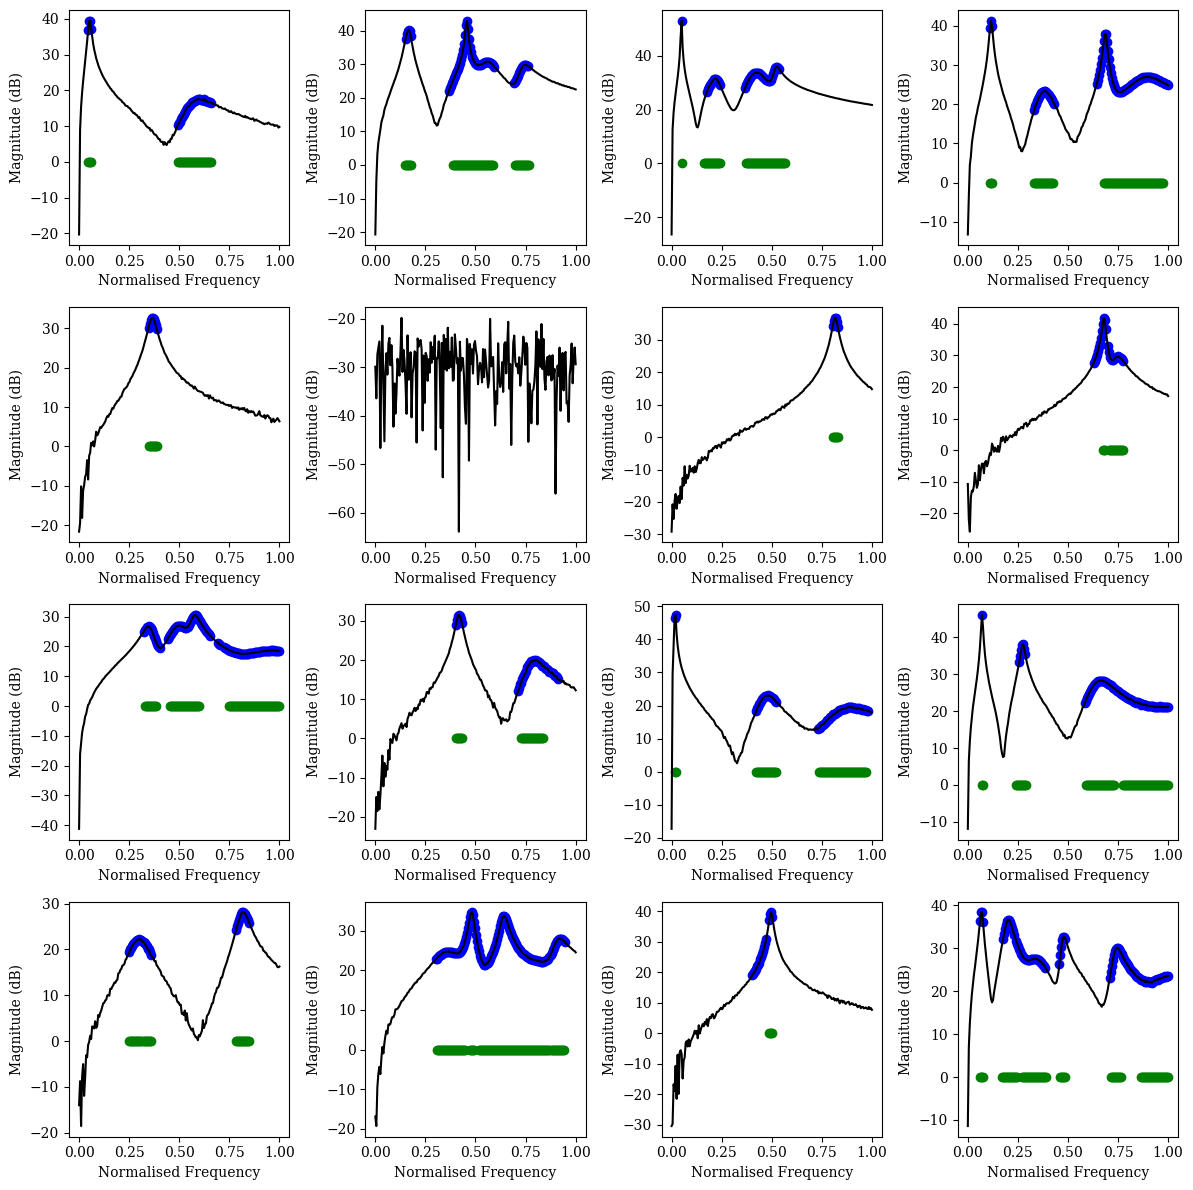

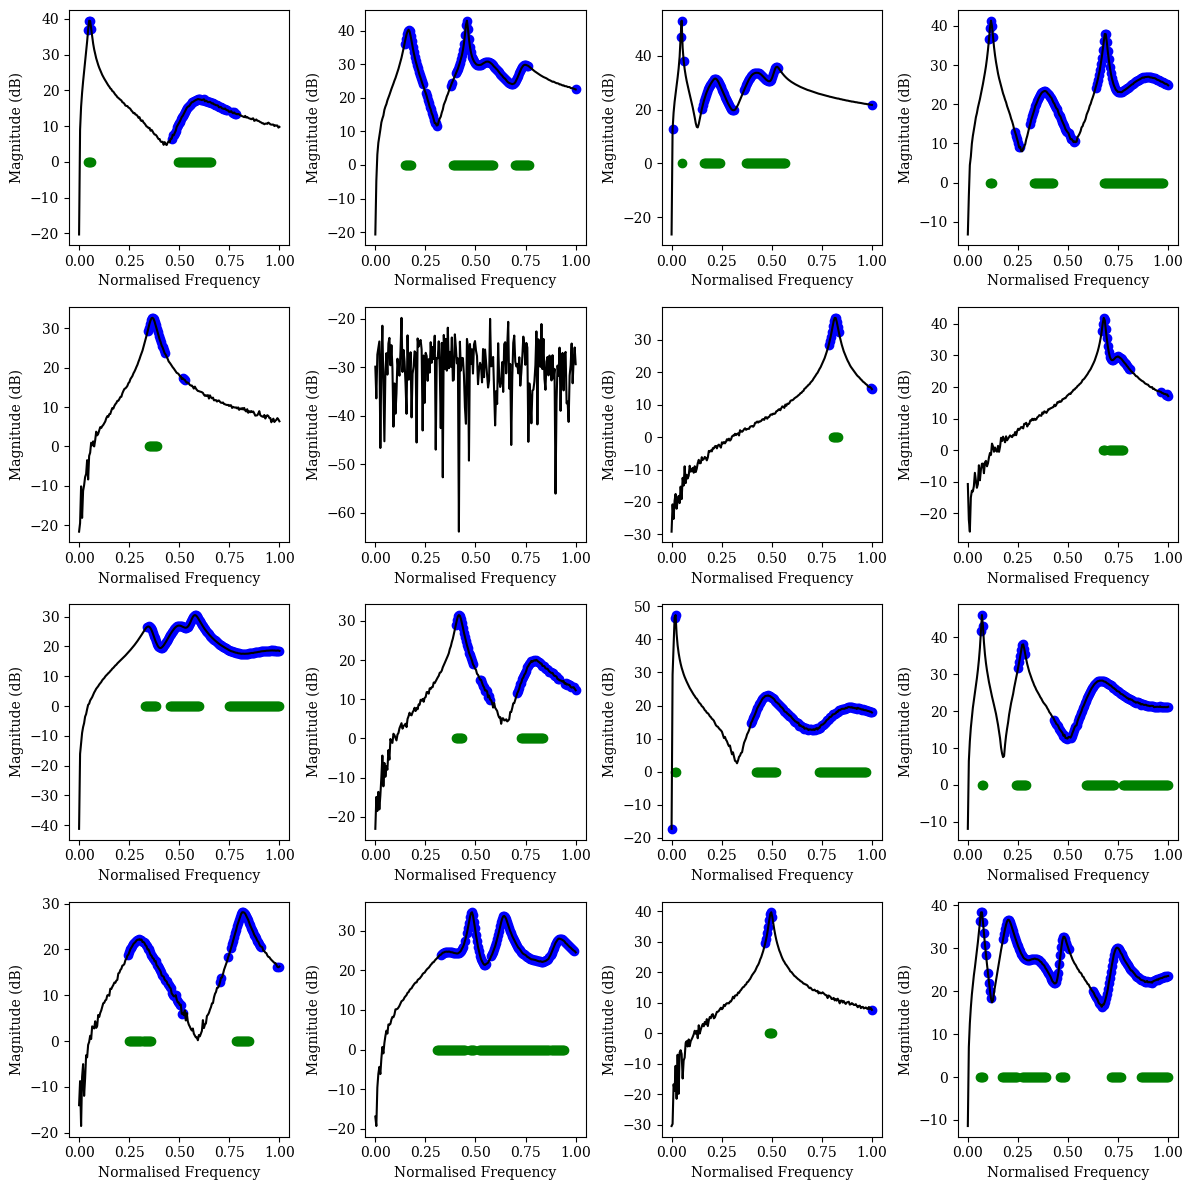

In [350]:
compare_models(neg_an_model_longer, RNN_model)

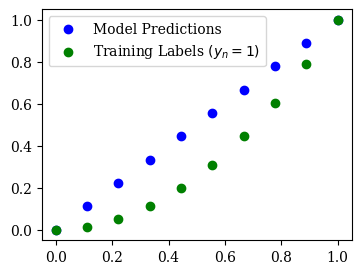

In [369]:
plt.figure(figsize=(4,3))
x = np.linspace(0,1,10)
plt.scatter(x, x,  c='blue', marker='o', label = 'Model Predictions')
plt.scatter(x, x**2,  c='green', marker='o', label=r'Training Labels $(y_n = 1)$')
plt.legend()
plt.show()

In [274]:
def extend_lab_tf(lab_tf):
    """Extend lab_tf with phase and magnitude information."""
    real_imag = modal.split_real_imag(lab_tf)
    phase = np.arctan(np.imag(lab_tf)/np.real(lab_tf))
    mag = np.abs(lab_tf)
    extended_op = np.concatenate((real_imag, phase.reshape(-1,1), mag.reshape(-1,1)), axis=1)
    return extended_op

In [300]:
def lab_predictions_extended(model, tf_arr, extended_tf, multiclass=False, normalise = None):
    lab_tf = modal.split_real_imag(tf_arr).reshape(1, -1, 2)
    if normalise is not None:
        lab_tf = normalise(lab_tf)

    lab_tf_tensor = torch.from_numpy(extended_tf).to(torch.float32)

    model.eval()
    with torch.no_grad():
        lab_tf_output = model(lab_tf_tensor)
    
    if multiclass:
        test_op = np.array(lab_tf_output.numpy())
        predictions = np.argmax(test_op, axis=-1).reshape(-1)
    else:
        test_op = lab_tf_output.numpy().reshape(-1)
        predictions = (test_op > 0.0).astype(int)
    
    input_tf = modal.split_real_imag(tf_arr)
    plot_tf(input_tf, predictions, figsize=(7,4)) # todb = True
    return test_op

In [276]:
lab_tf = lab.load_data()

2024-01-17 20:12:38.654 python[99273:16271307] +[CATransaction synchronize] called within transaction


In [277]:
lab_tf_2 = lab.load_data()

2024-01-17 20:12:55.744 python[99273:16271307] +[CATransaction synchronize] called within transaction


In [278]:
extended_tf = extend_lab_tf(lab_tf)
extended_tf_2 = extend_lab_tf(lab_tf_2)

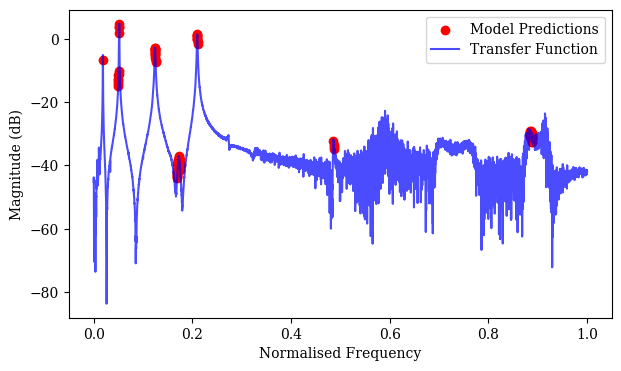

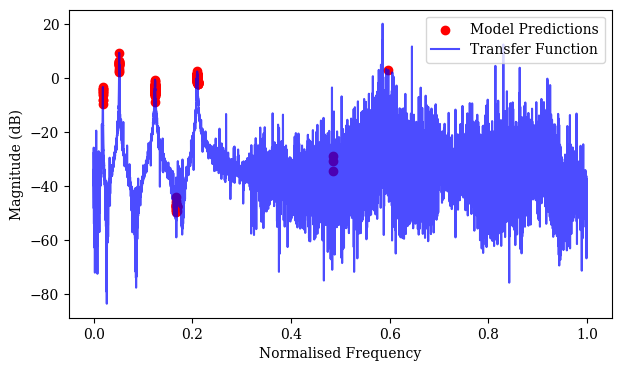

array([[ 7.1239123, -5.4998903, -5.935448 ],
       [ 9.505314 , -6.8691564, -7.7216773],
       [10.507147 , -7.2650366, -8.844704 ],
       ...,
       [ 6.1716337, -5.6888824, -6.8006086],
       [ 5.971538 , -5.474611 , -6.5042496],
       [ 5.5180683, -5.0224614, -5.6112614]], dtype=float32)

In [361]:
pred = lab_predictions_extended(multiclass, lab_tf, extended_tf, multiclass=True, normalise=None)
lab_predictions_extended(multiclass, lab_tf_2, extended_tf_2, multiclass=True, normalise=None)

In [303]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [311]:
print(pred.shape)

(8183, 3)


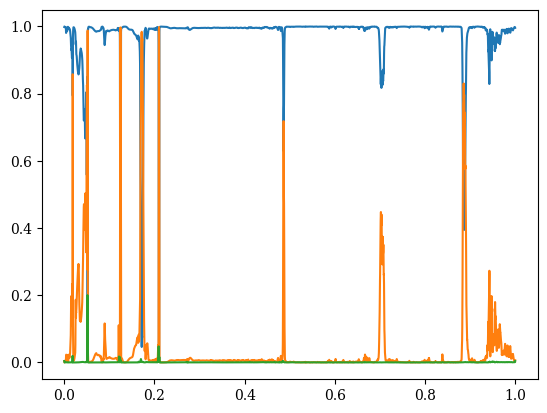

In [313]:
plt.plot(np.linspace(0,1, pred.shape[0]), sigmoid(pred))

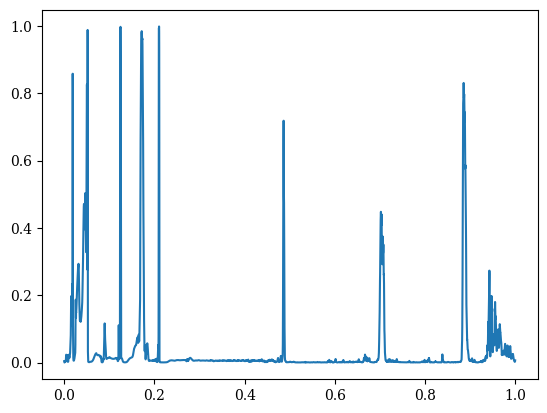

In [312]:
plt.plot(np.linspace(0,1, pred.shape[0]), sigmoid(pred[:,1]))

In [319]:
def generate_dat_extended(num_data, num_w_points, sigma_max = 0.15, max_modes = 7,
                multiclass = False, normalise = None, neg_an=True):
    """Generate num_data training examples with num_w_points frequency points.
    Pass normalisation function as a parameter. Include phase and magnintude 
    information in the output.
    X: (num_data, num_w_points, 4)
    Y: (num_data, num_w_points)
    ws: (num_data, max_modes)
    zs: (num_data, max_modes)"""
    X = []
    Y = []
    ws = []
    zs = []
    w = np.linspace(0, 1, num_w_points)
    for i in range(num_data):
        num_modes = np.random.randint(0, max_modes + 1)
        w_n = np.random.uniform(0, 1, num_modes)
        if neg_an:
            a_n = np.random.uniform(-2, 2, num_modes)
        else:
            a_n = np.random.uniform(1, 2, num_modes)
        z_n = np.random.uniform(0.01, 0.20, num_modes)
        sigma = np.random.uniform(0.01, sigma_max)
        out, y = modal.modal_sum(w, a_n, z_n, w_n, sigma, multiclass)

        if normalise is not None:
            out = normalise(out)

        real_imag = modal.split_real_imag(out)
        phase = np.arctan(np.imag(out)/np.real(out))
        mag = np.abs(out)
        extended_op = np.concatenate((real_imag, phase.reshape(-1,1), mag.reshape(-1,1)), axis=1)

        ws.append(w_n)
        zs.append(z_n)
        X.append(extended_op)
        Y.append(y)
    return np.array(X), np.array(Y), ws, zs

In [494]:
from matplotlib.lines import Line2D

In [501]:
def plot_predictions_extended(model, num_w_points=200, normalise=None, neg_an=True, multiclass=False, nrows=4, ncols=4,s=20, figsize=(12,12),):
    """Plot 4x4 grid of predictions on a validation set of data.
    val_inputs: (num_data, num_w_points, 2)
    val_outputs: (num_data, num_w_points)
    val_targets: (num_data, num_w_points)"""

    valX, valy, _, __ = generate_dat_extended(32*1, num_w_points, multiclass=multiclass, normalise=normalise, neg_an=neg_an)
    val_X = torch.from_numpy(valX).to(torch.float32)
    if multiclass:
        val_y = torch.from_numpy(valy).to(torch.long)
    else:
        val_y = torch.from_numpy(valy).to(torch.float32)

    if normalise is not None:
        val_X = normalise(val_X)
    dataset = TensorDataset(val_X, val_y)
    val_loader = DataLoader(dataset, batch_size=32, shuffle=False)

    model.eval()
    for val_inputs, val_targets in val_loader:
        with torch.no_grad():
            val_outputs = model(val_inputs)

    fig, axs = plt.subplots(nrows =nrows, ncols = ncols, figsize=figsize)

    w = np.linspace(0, 1, len(val_targets[0]))
    if nrows == 1 and ncols == 1:
        ax=axs
        index=1
        targets = np.array(val_targets[index].numpy())
        test_op = np.array(val_outputs[index].numpy())


        tf = val_inputs[index].numpy()[:,:2]

        if multiclass:
            predicted = np.argmax(test_op, axis=-1)
            ax.plot(w, modal.to_db(tf), c='black')

            ax.scatter(w[predicted == 1], modal.to_db(tf)[predicted == 1], c='blue', marker='o', label = 'Model Predictions (Class 1)', s=s)
            ax.scatter(w[predicted == 2], modal.to_db(tf)[predicted == 2], c='red', marker='o', s=s, label = 'Model Predictions (Class 2)')
            for i in range(len(w)):
                if targets[i] == 1:
                    color = 'green'
                    marker = ','
                    label = r'Training Labels ($y_n = 1$)' if i == 0 else None
                    ax.scatter(w[i], 0, c=color, marker=marker,s=s)
                if targets[i] == 2:
                    color = 'darkviolet'
                    marker = ','
                    label = r'Training Labels ($y_n = 2$)' if i == 0 else None
                    ax.scatter(w[i], 0, c=color, marker=marker,s=s)
            # ax.scatter(w[targets == 1], 0, c='green', marker='o', label=r'Training Labels ($y_m = 1$)', s=s)
            # ax.scatter(w[targets == 2], 0, c='m', marker='o',s=s, label=r'Training Labels ($y_m = 2$)')

            ax.set_xlabel('Normalised Frequency')
            ax.set_ylabel('Magnitude (dB)')
            ax.legend()
        else:
            predicted = (test_op > 0.0).astype(int)
            ax.plot(w, modal.to_db(tf), c='black')

            for i in range(len(w)):
                if i==0:
                    if predicted[i] == 1:
                        ax.scatter(w[i], modal.to_db(tf)[i], c='blue', marker='o', label = 'Model Predictions')
                    if targets[i] == 1:
                        ax.scatter(w[i], 0, c='green', marker='o', label=r'Training Labels ($y_n = 1$)')
                else:
                    if predicted[i] == 1:
                        ax.scatter(w[i], modal.to_db(tf)[i], c='blue', marker='o')
                        # ax.legend()
                    if targets[i] == 1:
                        ax.scatter(w[i], 0, c='green', marker='o')
                
            ax.set_xlabel('Normalised Frequency')
            ax.set_ylabel('Magnitude (dB)')
            ax.legend()
    
    else:
        for index, ax in enumerate(axs.flat):

            targets = np.array(val_targets[index].numpy())
            test_op = np.array(val_outputs[index].numpy())

            tf = val_inputs[index].numpy()[:,:2]

            if multiclass:
                predicted = np.argmax(test_op, axis=-1)
                ax.plot(w, modal.to_db(tf), c='black')

                for i in range(len(w)):
                    if predicted[i] == 1:
                        ax.scatter(w[i], modal.to_db(tf)[i], c='blue', marker='o', label = 'Model Predictions', s=s)
                    if predicted[i] == 2:
                        ax.scatter(w[i], modal.to_db(tf)[i], c='c', marker='o', s=s)
                    if targets[i] == 1:
                        ax.scatter(w[i], 0, c='green', marker='o', label=r'Training Labels ($y_n = 1$)', s=s)
                    if targets[i] == 2:
                        ax.scatter(w[i], 0, c='m', marker='o',s=s)

                ax.set_xlabel('Normalised Frequency')
                ax.set_ylabel('Magnitude (dB)')
                ax.legend()
            else:
                predicted = (test_op > 0.0).astype(int)
                ax.plot(w, modal.to_db(tf), c='black')

                for i in range(len(w)):
                    if i==0:
                        if predicted[i] == 1:
                            ax.scatter(w[i], modal.to_db(tf)[i], c='blue', marker='o', label = 'Model Predictions')
                        if targets[i] == 1:
                            ax.scatter(w[i], 0, c='green', marker='o', label=r'Training Labels ($y_n = 1$)')
                    else:
                        if predicted[i] == 1:
                            ax.scatter(w[i], modal.to_db(tf)[i], c='blue', marker='o')
                            # ax.legend()
                        if targets[i] == 1:
                            ax.scatter(w[i], 0, c='green', marker='o')
                    
                ax.set_xlabel('Normalised Frequency')
                ax.set_ylabel('Magnitude (dB)')
    
    legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8),
                  Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8),
                  Line2D([0], [0], marker='o', color='w',markerfacecolor='green', markersize=8),
                  Line2D([0], [0], marker='o', color='w',markerfacecolor='darkviolet', markersize=8)]

    legend_labels = ['Model Predictions (Class 1)', 'Model Predictions (Class 2)', 'Training Labels ($y_n = 1$)', 'Training Labels ($y_n = 2$)']

    ax.legend(legend_handles, legend_labels)
    # plt.legend()
    plt.tight_layout()

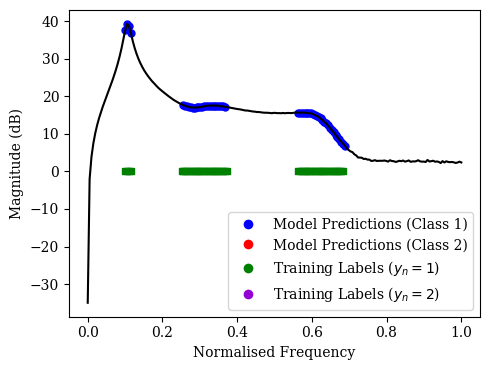

In [676]:
plot_predictions_extended(multiclass, multiclass=True, nrows=1, ncols=1, figsize=(5,3.8), s =25)

In [681]:
multiclass2 = torch.load('extended_model_multiclass(18.01)_200epochs.pth')

In [884]:
model = multiclass2
valX, valy, _, __ = generate_dat_extended(32*10, 200, multiclass=True, normalise=None, neg_an=False)
val_X = torch.from_numpy(valX).to(torch.float32)
val_y = torch.from_numpy(valy).to(torch.long)
dataset = TensorDataset(val_X, val_y)
val_loader = DataLoader(dataset, batch_size=32, shuffle=False)

model.eval()
for val_inputs, val_targets in val_loader:
    with torch.no_grad():
        val_outputs = model(val_inputs)

In [885]:
index=np.random.randint(0, 32)

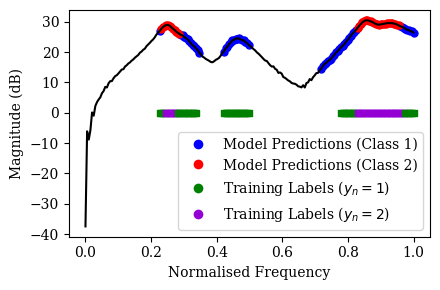

In [889]:
fig, axs = plt.subplots(figsize=(4.5,3))
s=25
w = np.linspace(0, 1, len(val_targets[0]))
ax=axs
targets = np.array(val_targets[index].numpy())
test_op = np.array(val_outputs[index].numpy())


tf = val_inputs[index].numpy()[:,:2]

predicted = np.argmax(test_op, axis=-1)
ax.plot(w, modal.to_db(tf), c='black')

ax.scatter(w[predicted == 1], modal.to_db(tf)[predicted == 1], c='blue', marker='o', label = 'Model Predictions (Class 1)', s=s)
ax.scatter(w[predicted == 2], modal.to_db(tf)[predicted == 2], c='red', marker='o', s=s, label = 'Model Predictions (Class 2)')
for i in range(len(w)):
    if targets[i] == 1:
        color = 'green'
        marker = ','
        label = r'Training Labels ($y_n = 1$)' if i == 0 else None
        ax.scatter(w[i], 0, c=color, marker=marker,s=s)
    if targets[i] == 2:
        color = 'darkviolet'
        marker = ','
        label = r'Training Labels ($y_n = 2$)' if i == 0 else None
        ax.scatter(w[i], 0, c=color, marker=marker,s=s)
# ax.scatter(w[targets == 1], 0, c='green', marker='o', label=r'Training Labels ($y_m = 1$)', s=s)
# ax.scatter(w[targets == 2], 0, c='m', marker='o',s=s, label=r'Training Labels ($y_m = 2$)')

ax.set_xlabel('Normalised Frequency')
ax.set_ylabel('Magnitude (dB)')
ax.legend()

legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8),
                Line2D([0], [0], marker='o', color='w',markerfacecolor='green', markersize=8),
                Line2D([0], [0], marker='o', color='w',markerfacecolor='darkviolet', markersize=8)]

legend_labels = ['Model Predictions (Class 1)', 'Model Predictions (Class 2)', 'Training Labels ($y_n = 1$)', 'Training Labels ($y_n = 2$)']

ax.legend(legend_handles, legend_labels)
# plt.legend()
plt.tight_layout()

In [677]:
multiclass2 = torch.load('extended_model_multiclass(18.01)_200epochs.pth')

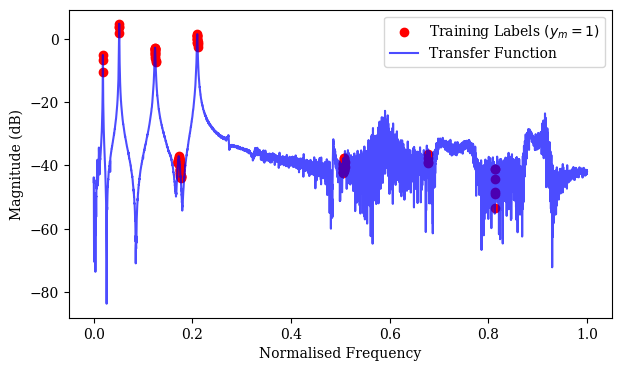

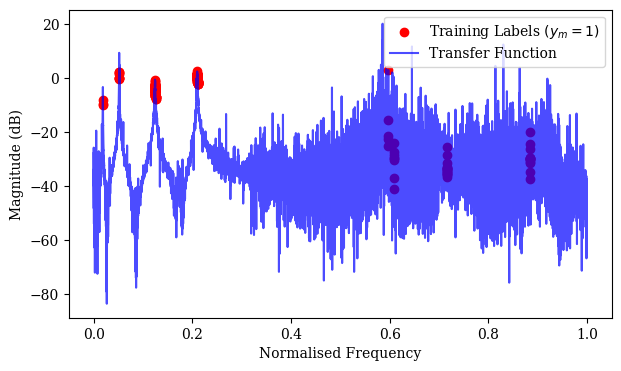

array([[ 5.4479094, -3.9099667, -5.6913586],
       [ 6.8049793, -5.113389 , -6.677457 ],
       [ 8.552391 , -6.3635297, -6.9107175],
       ...,
       [ 2.6570027, -2.1404278, -6.7230897],
       [ 2.519357 , -2.005464 , -6.2018147],
       [ 2.1885114, -1.7231709, -5.096549 ]], dtype=float32)

In [678]:
pred2 = lab_predictions_extended(multiclass2, lab_tf, extended_tf, multiclass=True, normalise=None)
lab_predictions_extended(multiclass2, lab_tf_2, extended_tf_2, multiclass=True, normalise=None)

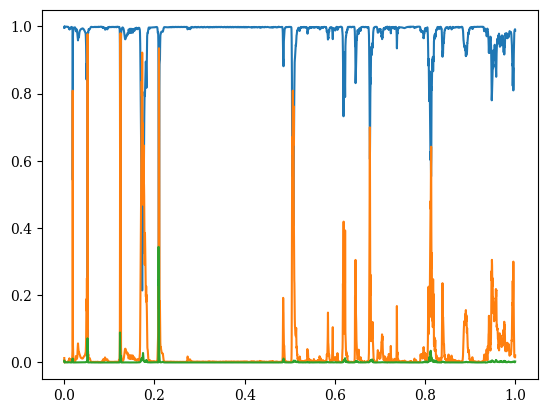

In [680]:
plt.plot(np.linspace(0,1, pred.shape[0]), sigmoid(pred2))